In [3]:
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fs5L htpps://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'NODE_MAJOR' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


v20.17.0


In [4]:
import pandas as pd

df = pd.read_csv('D:\\Semester 5\\DatminII\\ridwankml2.csv')
print (df)


     conversation_id_str                      created_at  favorite_count  \
0    1829834365976953294  Sat Aug 31 20:36:45 +0000 2024               0   
1    1829486691096359222  Sat Aug 31 20:32:32 +0000 2024               0   
2    1827706215889334273  Sat Aug 31 20:18:42 +0000 2024               0   
3    1829852680652718448  Sat Aug 31 20:18:08 +0000 2024               0   
4    1829834365976953294  Sat Aug 31 20:13:29 +0000 2024               0   
..                   ...                             ...             ...   
455  1829355976337904086  Sat Aug 31 05:46:48 +0000 2024               0   
456  1826524985009275102  Sat Aug 31 05:46:28 +0000 2024               0   
457  1829698651301822496  Sat Aug 31 05:46:10 +0000 2024               0   
458  1829757137616322833  Sat Aug 31 05:44:31 +0000 2024               0   
459  1829734608813867168  Sat Aug 31 05:44:26 +0000 2024               1   

                                             full_text               id_str  \
0    @Md

In [5]:
print (df["full_text"])

0      @Mdy_Asmara1701 apa kataku soal si ridwan kami...
1      @geloraco Kepuasan Publik Lom juga Kerja lo co...
2                          @ridwankamil KONTOL MIL KAMIL
3      @Yurissa_Samosir @geloraco @ridwankamil Ngurus...
4      @Mdy_Asmara1701 Kenapa dulu di JABAR KAGA KEPI...
                             ...                        
455          @abu_waras Eta terangkan lah.. @ridwankamil
456    @DadungKawuk @BosPurwa @BEM_FHUI @BEMFISIPUI @...
457    @drlrst Ini orang kebangetan lama lama ga lucu...
458         Ini nyindir @ridwankamil apa ukan sih bang ?
459    @detikcom Geus atuh kang @ridwankamil teu era ...
Name: full_text, Length: 460, dtype: object


In [6]:
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 460.


In [7]:
import re
from nltk import word_tokenize
def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() 
    for s in sents:
        s = s.strip().lower() 
        s = s.replace("\n", " ") 
        s = re.sub(r' [^a-zA-Z0-9 ]', ' ', s) 
        s = re.sub(' +', ' ', s) 
        s = re.sub(r'http\S+|www\S+|https\S+|t.co\S+', '', s)
        s = s.replace("yg", "") 
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in df["full_text"]:
    docs_clear.append(preprocess(d))

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = []
for i in docs_clear:
    stop = stopword.remove(i)
    kalimat.append(stop)
print(kalimat)

['@ mdy_asmara1701 apa kataku soal si ridwan kamil . orang tolol tetap menjadi orang tolol kalo gak belajar dr orang²  berkompeten berpengalaman . si rk bacaannya mgkn sm dg bacaan si jokowi dodo komik sinchan . belajarlah sm si miftah ato si ngabalin biar makin ambyaaar sel² otak .', '@ geloraco kepuasan publik lom kerja lo cong @ ridwankamil bilang kepuasan . gw bakal kampanye biar gada  milih lo', '@ ridwankamil kontol mil kamil', '@ yurissa_samosir @ geloraco @ ridwankamil ngurus banjir citarum wae teu begug bale endah banjir ungal taun macet bandung makin parah mesin parkir digital jadi rongsokan ? halu halu teuing siateh !', '@ mdy_asmara1701 dulu jabar kaga kepikiran bikin model ginian kang @ ridwankamil ?', '@ mdy_asmara1701 makin macet goblok ! ! @ ridwankamil plus  psikolog m ustadz nya gila mendadak', '@ rifkypras_ @ matanajwa @ ridwankamil knp gak menyelesaikan masalah  buat orang jadi stres ?', '@ pakarintelek pramono anung orang jatim ridwan kamil orang jabar dharma pongr

In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

hasil3 = []
for i in kalimat:
    stemmers = stemmer.stem(i)
    hasil3.append(stemmers)
print(hasil3)

['mdy asmara1701 apa kata soal si ridwan kamil orang tolol tetap jadi orang tolol kalo gak ajar dr orang kompeten alam si rk baca mgkn sm dg baca si jokowi dodo komik sinchan bajar sm si miftah ato si ngabalin biar makin ambyaaar sel otak', 'geloraco puas publik lom kerja lo cong ridwankamil bilang puas gw bakal kampanye biar gada milih lo', 'ridwankamil kontol mil kamil', 'yurissa samosir geloraco ridwankamil ngurus banjir citarum wae teu begug bale endah banjir ungal taun macet bandung makin parah mesin parkir digital jadi rongsok halu halu teuing siateh', 'mdy asmara1701 dulu jabar kaga pikir bikin model ginian kang ridwankamil', 'mdy asmara1701 makin macet goblok ridwankamil plus psikolog m ustadz nya gila dadak', 'rifkypras matanajwa ridwankamil knp gak selesai masalah buat orang jadi stres', 'pakarintelek pramono anung orang jatim ridwan kamil orang jabar dharma pongrekun orang sulawesi tengah terus mana asli jakarta', 'efaesem txtdrjkt ridwankamil percuma gak bakal mudeng', 'ban

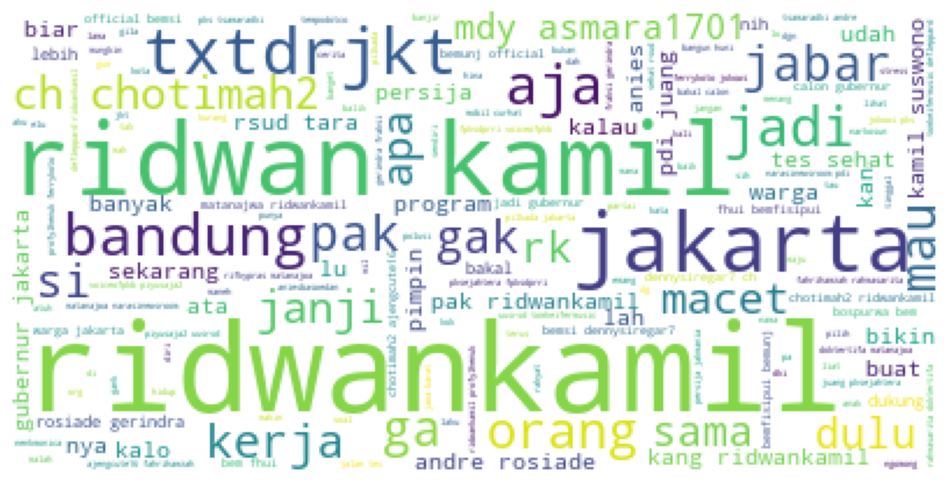

In [10]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

string = ' '.join(hasil3)
wordcloud = WordCloud(background_color="white").generate(string)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

In [11]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

tokens = word_tokenize(string)

freqword = [i for i in tokens if len(i) > 1]
fdist = FreqDist(freqword)
print(fdist.most_common(10))

[('ridwankamil', 332), ('ridwan', 142), ('kamil', 131), ('jakarta', 130), ('txtdrjkt', 55), ('pak', 55), ('jadi', 53), ('bandung', 41), ('gubernur', 41), ('aja', 40)]


In [12]:
from gensim.models import Word2Vec
import re

tweets_tokenized = [tweet.split() for tweet in hasil3]

model_w2v = Word2Vec(sentences=tweets_tokenized, vector_size=100, window=5, min_count=2, sg=1)  


In [13]:
import numpy as np

def get_tweet_vector(tweet):
    words = tweet.split()
    word_vecs = [model_w2v.wv[word] for word in words if word in model_w2v.wv]
    if len(word_vecs) == 0:
        return np.zeros(100) 
    return np.mean(word_vecs, axis=0)

tweet_vectors = np.array([get_tweet_vector(tweet) for tweet in hasil3])
tweet_vectors = np.nan_to_num(tweet_vectors)
tweet_vectors


array([[-0.05600528,  0.06591245,  0.03705291, ..., -0.16910905,
         0.05993506, -0.05210069],
       [-0.05148187,  0.06468898,  0.03178697, ..., -0.15578079,
         0.05547017, -0.04753111],
       [-0.08265851,  0.09724417,  0.0498307 , ..., -0.23394722,
         0.08623157, -0.06678327],
       ...,
       [-0.06220827,  0.07641736,  0.0424948 , ..., -0.18880062,
         0.06630168, -0.05758158],
       [-0.06317321,  0.07257607,  0.04027371, ..., -0.17354624,
         0.06160624, -0.04882026],
       [-0.04593932,  0.05859926,  0.03005072, ..., -0.14180258,
         0.04620481, -0.03906874]], dtype=float32)

c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

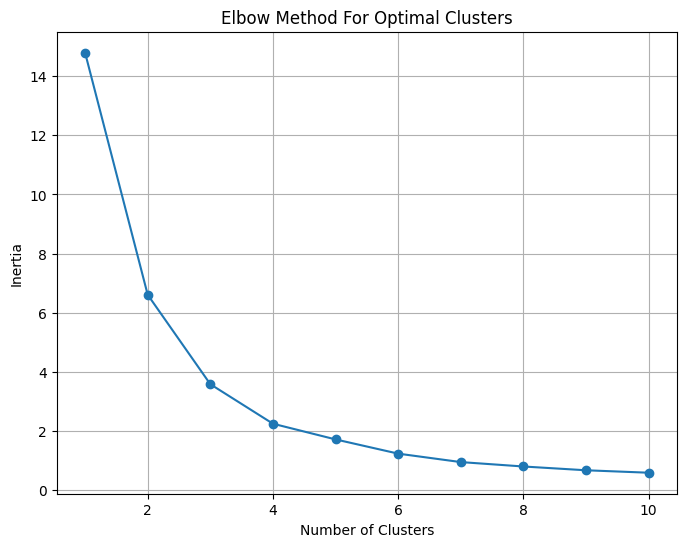

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_elbow_method(X, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_) 

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method For Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

plot_elbow_method(tweet_vectors, max_clusters=10)


c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

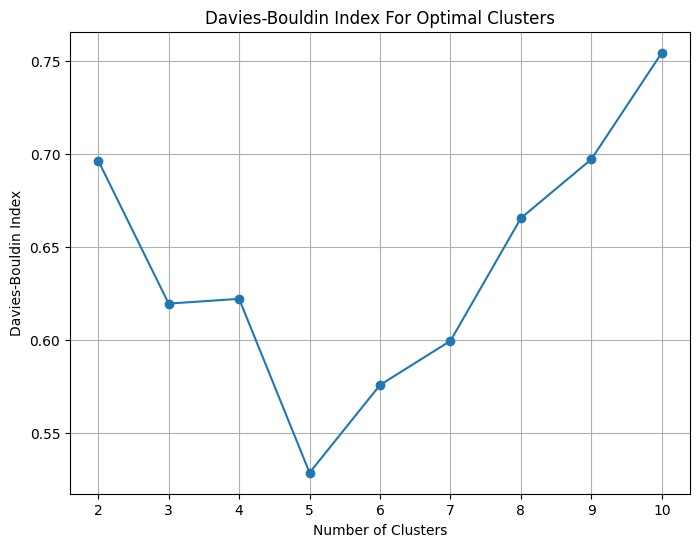

In [15]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_davies_bouldin(X, max_clusters=10):
    davies_bouldin_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(score)

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Index For Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.grid(True)
    plt.show()

plot_davies_bouldin(tweet_vectors, max_clusters=10)


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tweet_vectors)
labels = kmeans.labels_

silscore = silhouette_score(tweet_vectors, labels)
print("Silhoutte Score:", silscore)

Silhoutte Score: 0.50343674


c:\Users\ditha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
from collections import defaultdict

clustered_tweets = defaultdict(list)

for i, tweet in enumerate(hasil3): 
    clustered_tweets[labels[i]].append(tweet)

for cluster, tweets in clustered_tweets.items():
    print(f"Cluster {cluster}:")
    for tweet in tweets[:3]: 
        print(f"- {tweet}")

Cluster 0:
- mdy asmara1701 apa kata soal si ridwan kamil orang tolol tetap jadi orang tolol kalo gak ajar dr orang kompeten alam si rk baca mgkn sm dg baca si jokowi dodo komik sinchan bajar sm si miftah ato si ngabalin biar makin ambyaaar sel otak
- mdy asmara1701 dulu jabar kaga pikir bikin model ginian kang ridwankamil
- mdy asmara1701 makin macet goblok ridwankamil plus psikolog m ustadz nya gila dadak
Cluster 1:
- geloraco puas publik lom kerja lo cong ridwankamil bilang puas gw bakal kampanye biar gada milih lo
- yurissa samosir geloraco ridwankamil ngurus banjir citarum wae teu begug bale endah banjir ungal taun macet bandung makin parah mesin parkir digital jadi rongsok halu halu teuing siateh
- pakarintelek pramono anung orang jatim ridwan kamil orang jabar dharma pongrekun orang sulawesi tengah terus mana asli jakarta
Cluster 2:
- ridwankamil kontol mil kamil
- efaesem txtdrjkt ridwankamil percuma gak bakal mudeng
- ch chotimah2 ridwankamil kok


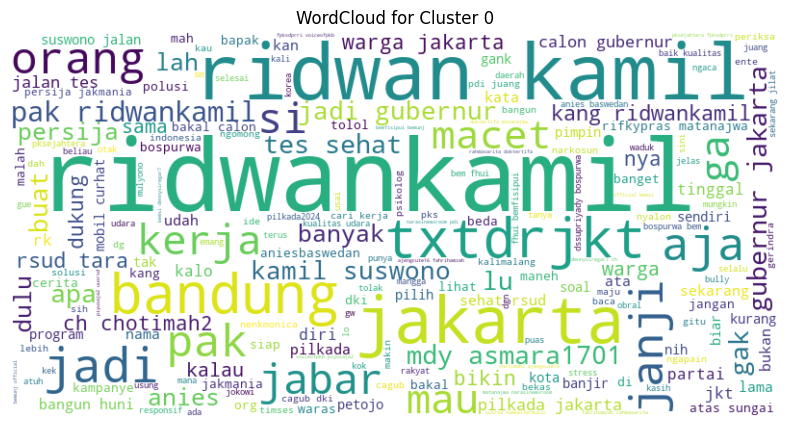

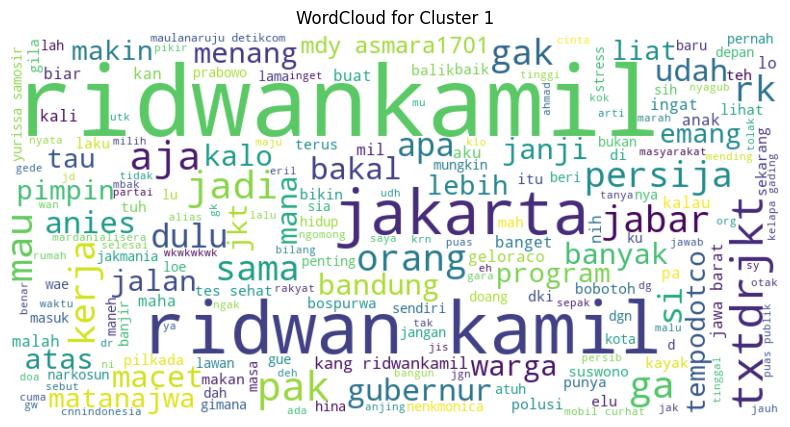

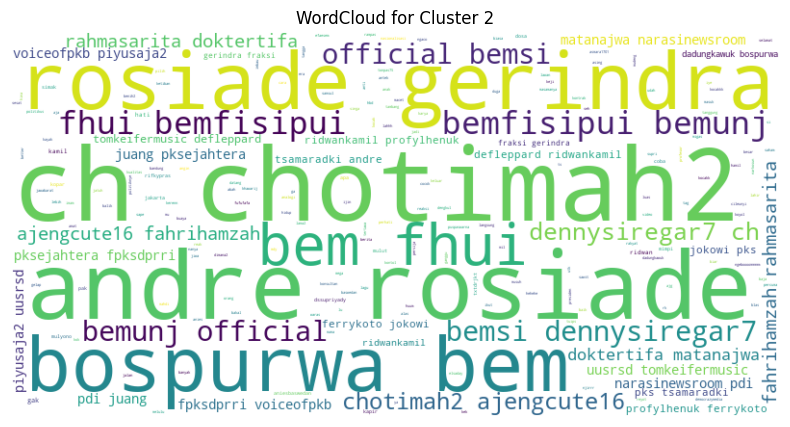

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

clustered_tweets = defaultdict(list)

for i, tweet in enumerate(hasil3):
    clustered_tweets[labels[i]].append(tweet)

def generate_wordcloud(text, cluster_num):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Cluster {cluster_num}")
    plt.show()

for cluster, tweets in clustered_tweets.items():
    all_text = ' '.join(tweets)
    generate_wordcloud(all_text, cluster)


In [75]:
import networkx as nx
G = nx.Graph()

for index, row in df.iterrows():
    author = f"@{row['username']}"
    text = row['full_text']

    mentions = set(re.findall(r"@(\w+)", text))

    for mention in mentions:
        mention = f"@{mention}"
        if G.has_edge(author, mention):
            G[author][mention]['weight'] += 1
        else:
            G.add_edge(author, mention, weight=1)

In [70]:
edges_df = pd.DataFrame([(u, v, d['weight']) for u, v, d in G.edges(data=True)],
                        columns=['source', 'target', 'weight'])
print(edges_df)

               source            target  weight
0       @Ikalel_Eotas   @Mdy_Asmara1701       1
1       @Ikalel_Eotas         @BosPurwa       1
2     @Mdy_Asmara1701       @Delimaroon       1
3     @Mdy_Asmara1701       @trio_bunny       1
4     @Mdy_Asmara1701   @ArungSamudra39       1
..                ...               ...     ...
759     @irfanfaria24  @HimawanIma85713       1
760     @nasiuduk7000       @03__nakula       1
761     @nasiuduk7000           @AaOj3k       1
762    @SekadauTasaka    @PaltiWest2024       1
763  @keuangannews_id         @Keuangan       1

[764 rows x 3 columns]


In [74]:
from operator import itemgetter

G_mention = G

graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

print(f"Node dengan degree centrality tertinggi: {max_de}")
print(f"Node dengan closeness centrality tertinggi: {max_clo}")
print(f"Node dengan betweenness centrality tertinggi: {max_bet}")


Node dengan degree centrality tertinggi: ('@ridwankamil', 0.5728744939271255)
Node dengan closeness centrality tertinggi: ('@ridwankamil', 0.6050001143667513)
Node dengan betweenness centrality tertinggi: ('@ridwankamil', 0.819354354009804)


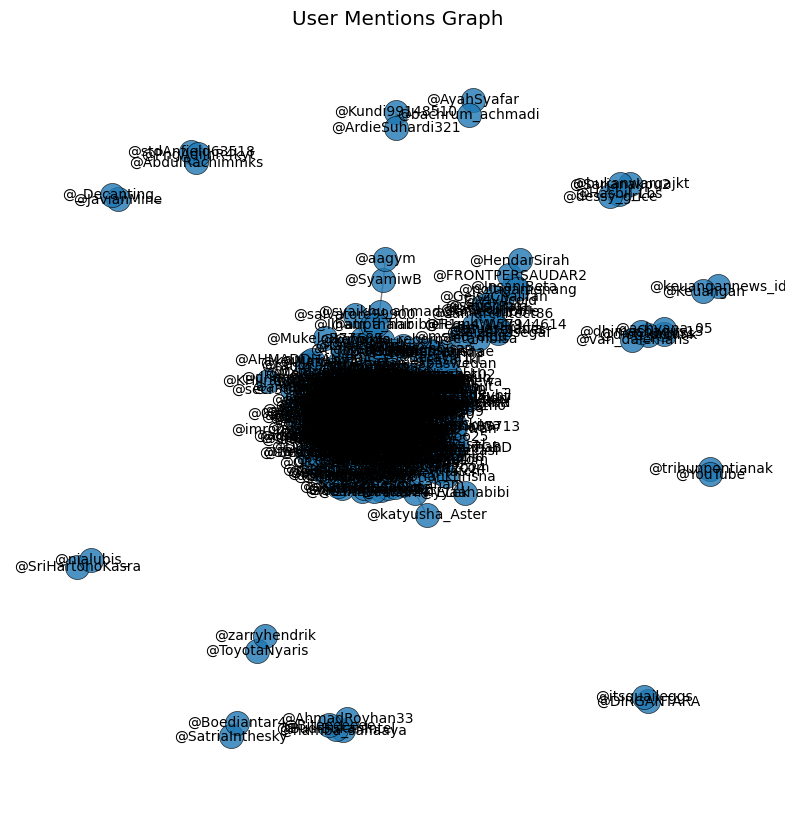

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plt.title("User Mentions Graph")
plt.axis('off')
plt.show()

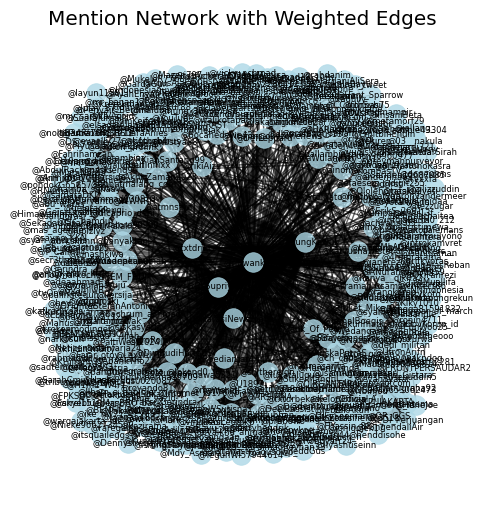

In [78]:
pos = nx.spring_layout(G, k=0.6, iterations=10) 
f, ax = plt.subplots(figsize=(6, 6))

plt.style.use('ggplot')
nx.draw_networkx_nodes(G, pos, alpha=0.8, node_size=200, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges()], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=6)
plt.title("Mention Network with Weighted Edges")
plt.axis('off')
plt.show()

In [79]:
df_mention = nx.to_pandas_edgelist(G_mention)
df_mention.to_csv('mention.csv', index=False)